In [21]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Conv2D, MaxPool2D, Dropout, SimpleRNN, Embedding, LSTM, GRU, RepeatVector, TimeDistributed
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
tf.keras.utils.set_random_seed(42)

### 텍스트 길이 정규화 라이브러리
# - 텍스트의 길이가 긴 경우에는 자르고, 길이가 짧은 경우에는 채움
from tensorflow.keras.preprocessing.sequence import pad_sequences


### 말뭉치 사전 처리를 위한 라이브러리
# - 텍스트 데이터를 수자(인덱스번호)로 변환하는 라이브러리
from tensorflow.keras.preprocessing.text import Tokenizer



In [22]:
### 질문
questions = [
    "전기요금 어때?",
    "전기요금 알려줘",
    "안녕하세요",
    "안녕",
    "너 이름이 뭐니?",
    "이름이 뭐야",
    "어떻게 지내세요?",
    "프랑스의 수도는 어디인가요?",
    "뭐 해?",
    "오늘 날씨 어때?",
    "좋아하는 음식은 뭐에요?",
    "무슨 일을 좋아해요?",
    "가장 좋아하는 색깔은 무엇인가요?",
    "가장 기억에 남는 여행은 어디에요?",
    "주말에는 뭐하고 시간을 보내나요?",
    "좋아하는 음악 장르가 있나요?",
    "가장 좋아하는 동물은 무엇인가요?",
    "가장 감명 깊게 본 영화는 무엇인가요?",
    "뭐 해?",
    "오늘 날씨 어때?",
    "좋아하는 음식은 뭐에요?",
    "무슨 일을 좋아해요?",
    "가장 좋아하는 색깔은 무엇인가요?",
    "가장 기억에 남는 여행은 어디에요?",
    "주말에는 뭐하고 시간을 보내나요?",
    "좋아하는 음악 장르가 있나요?",
    "가장 좋아하는 동물은 무엇인가요?",
    "전기요금 어때?",
    "안녕하세요",
    "너 이름이 뭐니?",
    "어떻게 지내세요?",
    "프랑스의 수도는 어디인가요?",
    "뭐 해?",
    "오늘 날씨 어때?",
    "좋아하는 음식은 뭐에요?",
    "무슨 일을 좋아해요?",
    "가장 좋아하는 색깔은 무엇인가요?",
    "가장 기억에 남는 여행은 어디에요?",
    "주말에는 뭐하고 시간을 보내나요?",
    "좋아하는 음악 장르가 있나요?",
    "가장 좋아하는 동물은 무엇인가요?",
    "가장 감명 깊게 본 영화는 무엇인가요?",
    "뭐 해?",
    "오늘 날씨 어때?",
    "좋아하는 음식은 뭐에요?",
    "무슨 일을 좋아해요?",
    "가장 좋아하는 색깔은 무엇인가요?",
    "가장 기억에 남는 여행은 어디에요?",
    "주말에는 뭐하고 시간을 보내나요?",
    "좋아하는 음악 장르가 있나요?",
    "가장 좋아하는 동물은 무엇인가요?",
    "가장 감명 깊게 본 영화는 '인셉션'이에요."
]

### 답변
answers = [
    "전기요금이 계속 인상되고 있어요!",
    "전기요금이 계속 인상되고 있어요!",
    "안녕하세요! 반가워요^^",
    "안녕하세요! 반가워요^^",
    "제 이름은 챗봇이에요.",
    "제 이름은 챗봇이에요.",
    "저는 잘 지내고 있어요, 감사합니다!",
    "프랑스의 수도는 파리에요.",
    "일하고 있어요.",
    "오늘은 맑아요.",
    "제가 좋아하는 음식은 피자에요.",
    "일을 하는 것을 좋아해요.",
    "제가 가장 좋아하는 색깔은 파란색이에요.",
    "가장 기억에 남는 여행은 파리에 다녀온 것이에요.",
    "주말에는 쉬면서 책을 읽거나 친구들과 만나요.",
    "저는 다양한 음악을 즐겨듣습니다.",
    "가장 좋아하는 동물은 강아지에요.",
    "가장 감명 깊게 본 영화는 '인셉션'이에요.",
    "일하고 있어요.",
    "오늘은 맑아요.",
    "제가 좋아하는 음식은 피자에요.",
    "일을 하는 것을 좋아해요.",
    "제가 가장 좋아하는 색깔은 파란색이에요.",
    "가장 기억에 남는 여행은 파리에 다녀온 것이에요.",
    "주말에는 쉬면서 책을 읽거나 친구들과 만나요.",
    "저는 다양한 음악을 즐겨듣습니다.",
    "가장 좋아하는 동물은 강아지에요.",
    "전기요금이 계속 인상되고 있어요!",
    "안녕하세요! 반가워요^^",
    "제 이름은 챗봇이에요.",
    "저는 잘 지내고 있어요, 감사합니다!",
    "프랑스의 수도는 파리에요.",
    "일하고 있어요.",
    "오늘은 맑아요.",
    "제가 좋아하는 음식은 피자에요.",
    "일을 하는 것을 좋아해요.",
    "제가 가장 좋아하는 색깔은 파란색이에요.",
    "가장 기억에 남는 여행은 파리에 다녀온 것이에요.",
    "주말에는 쉬면서 책을 읽거나 친구들과 만나요.",
    "저는 다양한 음악을 즐겨듣습니다.",
    "가장 좋아하는 동물은 강아지에요.",
    "가장 감명 깊게 본 영화는 '인셉션'이에요.",
    "일하고 있어요.",
    "오늘은 맑아요.",
    "제가 좋아하는 음식은 피자에요.",
    "일을 하는 것을 좋아해요.",
    "제가 가장 좋아하는 색깔은 파란색이에요.",
    "가장 기억에 남는 여행은 파리에 다녀온 것이에요.",
    "주말에는 쉬면서 책을 읽거나 친구들과 만나요.",
    "저는 다양한 음악을 즐겨듣습니다.",
    "가장 좋아하는 동물은 강아지에요.",
    "가장 감명 깊게 본 영화는 '인셉션'이에요."
]

In [23]:
### 질문/답변 갯수 확인하기
len(questions), len(answers)

(52, 52)

### 단어사전(말뭉치) 만들기

In [24]:
"""
<말뭉치 사전>
 - 데이터셋에 있는 모든 문장(질문+답변) 내에 단어들을 추출하여
 - 빈도가 가장 높은 단어 순으로 번호(인덱스)를 부여하여 관리함
 - 고유한 단어들만으로 구성된 사정을 의미합니다
 - 문장에서 단어를 추출하여 번호를 부여하는 것을 --> 토큰화(tokenizer) 하고 칭합니다.
"""

'\n<말뭉치 사전>\n - 데이터셋에 있는 모든 문장(질문+답변) 내에 단어들을 추출하여\n - 빈도가 가장 높은 단어 순으로 번호(인덱스)를 부여하여 관리함\n - 고유한 단어들만으로 구성된 사정을 의미합니다\n - 문장에서 단어를 추출하여 번호를 부여하는 것을 --> 토큰화(tokenizer) 하고 칭합니다.\n'

In [ ]:
### 텍스트 문장 데이터를 토큰화 (단어로 분리하여 숫자 인덱스화)를 위한 클래스 생성
tokenizer = Tokenizer()
tokenizer

In [26]:
### 토큰화 함수 : fit_on_texts
# - 텍스트에서 단어 추출 및 인덱스화
# - 질문 및 답변의 모든 문장 내에 단어들을 인덱스화 해야합니다.
#  -> 질문과 답변의 각각의 리스트를 더하기 연산하여 하나의 리스트로 사용
# - 문장내 단어들을 모두 추출하여 빈도가 가장 높은 순서대로 1부터 인덱스 번호가 부여됩니다.
# - 문장내 단어의 분리는 -> 띄워쓰기 기준으로 분리함
tokenizer.fit_on_texts(questions+answers)

In [27]:
### 전체 분리된 단어들의 갯수 확인하기
len(tokenizer.word_index)

77

In [28]:
### 단어들의 순서 확인하기
# - 딕셔너리 타입으로 정의되어 있습니다. (사전의 의미임)
tokenizer.word_index

{'가장': 1,
 '좋아하는': 2,
 '무엇인가요': 3,
 '있어요': 4,
 '음식은': 5,
 '일을': 6,
 '좋아해요': 7,
 '색깔은': 8,
 '기억에': 9,
 '남는': 10,
 '여행은': 11,
 '주말에는': 12,
 '동물은': 13,
 '제가': 14,
 '어때': 15,
 '감명': 16,
 '깊게': 17,
 '본': 18,
 '영화는': 19,
 '저는': 20,
 '안녕하세요': 21,
 '프랑스의': 22,
 '수도는': 23,
 '뭐': 24,
 '해': 25,
 '오늘': 26,
 '날씨': 27,
 '뭐에요': 28,
 '무슨': 29,
 '어디에요': 30,
 '뭐하고': 31,
 '시간을': 32,
 '보내나요': 33,
 '음악': 34,
 '장르가': 35,
 '있나요': 36,
 "'인셉션'이에요": 37,
 '일하고': 38,
 '오늘은': 39,
 '맑아요': 40,
 '피자에요': 41,
 '하는': 42,
 '것을': 43,
 '파란색이에요': 44,
 '파리에': 45,
 '다녀온': 46,
 '것이에요': 47,
 '쉬면서': 48,
 '책을': 49,
 '읽거나': 50,
 '친구들과': 51,
 '만나요': 52,
 '다양한': 53,
 '음악을': 54,
 '즐겨듣습니다': 55,
 '강아지에요': 56,
 '전기요금': 57,
 '이름이': 58,
 '전기요금이': 59,
 '계속': 60,
 '인상되고': 61,
 '반가워요': 62,
 '제': 63,
 '이름은': 64,
 '챗봇이에요': 65,
 '너': 66,
 '뭐니': 67,
 '어떻게': 68,
 '지내세요': 69,
 '어디인가요': 70,
 '잘': 71,
 '지내고': 72,
 '감사합니다': 73,
 '파리에요': 74,
 '알려줘': 75,
 '안녕': 76,
 '뭐야': 77}

### 훈련 시 사용할 말뭉치 갯수 정의하기

In [29]:
### 말뭉치에 포함되지 않은 단어의 경우를 처리하기 위하여
# - 토큰화한 결과의 갯수에 1을 더하여 사용합니다.

### 훈련시 사용할 말뭉치 갯수
vocab_size = len(tokenizer.word_index)+1
vocab_size

78

### 데이터셋의 텍스트를 말뭉치의 인덱스번호와 매핑하여 숫자화하기

In [30]:
### 텍스트를 말뭉치의 인덱스번호로 숫자화하는 함수
# - texts_to_sequences(텍스트데이터) 사용

### 질문 데이터를 인덱스화 하기
questions_sequences = tokenizer.texts_to_sequences(questions)

print(len(questions_sequences))

52


In [31]:
### 인덱스화된 질문데이터
# - 2차원 데이터 입니다.
questions_sequences

[[57, 15],
 [57, 75],
 [21],
 [76],
 [66, 58, 67],
 [58, 77],
 [68, 69],
 [22, 23, 70],
 [24, 25],
 [26, 27, 15],
 [2, 5, 28],
 [29, 6, 7],
 [1, 2, 8, 3],
 [1, 9, 10, 11, 30],
 [12, 31, 32, 33],
 [2, 34, 35, 36],
 [1, 2, 13, 3],
 [1, 16, 17, 18, 19, 3],
 [24, 25],
 [26, 27, 15],
 [2, 5, 28],
 [29, 6, 7],
 [1, 2, 8, 3],
 [1, 9, 10, 11, 30],
 [12, 31, 32, 33],
 [2, 34, 35, 36],
 [1, 2, 13, 3],
 [57, 15],
 [21],
 [66, 58, 67],
 [68, 69],
 [22, 23, 70],
 [24, 25],
 [26, 27, 15],
 [2, 5, 28],
 [29, 6, 7],
 [1, 2, 8, 3],
 [1, 9, 10, 11, 30],
 [12, 31, 32, 33],
 [2, 34, 35, 36],
 [1, 2, 13, 3],
 [1, 16, 17, 18, 19, 3],
 [24, 25],
 [26, 27, 15],
 [2, 5, 28],
 [29, 6, 7],
 [1, 2, 8, 3],
 [1, 9, 10, 11, 30],
 [12, 31, 32, 33],
 [2, 34, 35, 36],
 [1, 2, 13, 3],
 [1, 16, 17, 18, 19, 37]]

In [32]:
### 질문에 대한 최대값, 최소값, 중앙값 확인하기
# 52개 각각의 문장 내에 단어 갯수 확인하기
question_lengths = np.array([len(i) for i in questions_sequences])

print(np.max(question_lengths))
print(np.min(question_lengths))
print(np.median(question_lengths))

6
1
3.0


In [33]:
answers_sequences = tokenizer.texts_to_sequences(answers)

print(len(questions_sequences))

52


In [34]:
answer_lengths = np.array([len(i) for i in answers_sequences])

print(np.max(answer_lengths))
print(np.min(answer_lengths))
print(np.median(answer_lengths))

7
2
4.0


### 질문 및 답변 데이터 각각에 대해 데이터 스케일링하기

In [35]:
### 질문 데이터 데이터 스케일링 하기(최대 길이로 스케일링)
# - c최대 단어 길이로 스케일링하기에, 자르는 값 없음, 채우는 값만 존재함
# - maxlen 속성은 6, maxlen을 생략하면 -> 전체 데이터의 길이중 최대값을 사용하게됨
questions_padded = pad_sequences(questions_sequences, padding="post")
questions_padded

array([[57, 15,  0,  0,  0,  0],
       [57, 75,  0,  0,  0,  0],
       [21,  0,  0,  0,  0,  0],
       [76,  0,  0,  0,  0,  0],
       [66, 58, 67,  0,  0,  0],
       [58, 77,  0,  0,  0,  0],
       [68, 69,  0,  0,  0,  0],
       [22, 23, 70,  0,  0,  0],
       [24, 25,  0,  0,  0,  0],
       [26, 27, 15,  0,  0,  0],
       [ 2,  5, 28,  0,  0,  0],
       [29,  6,  7,  0,  0,  0],
       [ 1,  2,  8,  3,  0,  0],
       [ 1,  9, 10, 11, 30,  0],
       [12, 31, 32, 33,  0,  0],
       [ 2, 34, 35, 36,  0,  0],
       [ 1,  2, 13,  3,  0,  0],
       [ 1, 16, 17, 18, 19,  3],
       [24, 25,  0,  0,  0,  0],
       [26, 27, 15,  0,  0,  0],
       [ 2,  5, 28,  0,  0,  0],
       [29,  6,  7,  0,  0,  0],
       [ 1,  2,  8,  3,  0,  0],
       [ 1,  9, 10, 11, 30,  0],
       [12, 31, 32, 33,  0,  0],
       [ 2, 34, 35, 36,  0,  0],
       [ 1,  2, 13,  3,  0,  0],
       [57, 15,  0,  0,  0,  0],
       [21,  0,  0,  0,  0,  0],
       [66, 58, 67,  0,  0,  0],
       [68

In [36]:
### 답변 데이터 데이터 스케일링 하기(최대 길이로 스케일링)
answers_padded = pad_sequences(answers_sequences, padding="post")
answers_padded

array([[59, 60, 61,  4,  0,  0,  0],
       [59, 60, 61,  4,  0,  0,  0],
       [21, 62,  0,  0,  0,  0,  0],
       [21, 62,  0,  0,  0,  0,  0],
       [63, 64, 65,  0,  0,  0,  0],
       [63, 64, 65,  0,  0,  0,  0],
       [20, 71, 72,  4, 73,  0,  0],
       [22, 23, 74,  0,  0,  0,  0],
       [38,  4,  0,  0,  0,  0,  0],
       [39, 40,  0,  0,  0,  0,  0],
       [14,  2,  5, 41,  0,  0,  0],
       [ 6, 42, 43,  7,  0,  0,  0],
       [14,  1,  2,  8, 44,  0,  0],
       [ 1,  9, 10, 11, 45, 46, 47],
       [12, 48, 49, 50, 51, 52,  0],
       [20, 53, 54, 55,  0,  0,  0],
       [ 1,  2, 13, 56,  0,  0,  0],
       [ 1, 16, 17, 18, 19, 37,  0],
       [38,  4,  0,  0,  0,  0,  0],
       [39, 40,  0,  0,  0,  0,  0],
       [14,  2,  5, 41,  0,  0,  0],
       [ 6, 42, 43,  7,  0,  0,  0],
       [14,  1,  2,  8, 44,  0,  0],
       [ 1,  9, 10, 11, 45, 46, 47],
       [12, 48, 49, 50, 51, 52,  0],
       [20, 53, 54, 55,  0,  0,  0],
       [ 1,  2, 13, 56,  0,  0,  0],
 

### 훈련 : 테스트 = 8 : 2로 분류하기

In [37]:
# - 독립변수 = 질문 데이터
# - 종속변수 = 답변 데이터
# 변수명 : questions_train, answers_train, questions_val, answers_val
questions_train, questions_val, answers_train, answers_val = train_test_split(
    questions_padded, answers_padded,test_size=0.2, random_state=42)

print(questions_train.shape, answers_train.shape)
print(questions_val.shape, answers_val.shape)

(41, 6) (41, 7)
(11, 6) (11, 7)


### 모델 훈련하기

In [38]:
"""
<계층 구조 - SimpleRNN먼저 사용>
 - 입력계층 : 임베딩계층 사용
 - 은닉계층 : SimpleRNN 사용()
 - 은닉계층 : 답변 차원으로 변형하는 계층(RepeatVector 계층)
 - 은닉계층 : 질문에 대한 답변과 일치성 계층(SimpleRNN)
 - 출력계층 : 질문에 대한 답변에 대한 단어를 조합하는 계층 + 출력계층
"""

'\n<계층 구조 - SimpleRNN먼저 사용>\n - 입력계층 : 임베딩계층 사용\n - 은닉계층 : SimpleRNN 사용()\n - 은닉계층 : 답변 차원으로 변형하는 계층(RepeatVector 계층)\n - 은닉계층 : 질문에 대한 답변과 일치성 계층(SimpleRNN)\n - 출력계층 : 질문에 대한 답변에 대한 단어를 조합하는 계층 + 출력계층\n'

In [39]:
### 모델 생성하기

model = Sequential([
    ### 입력계층 추가하기(임베딩 계층 추가하기)
    # - input_dim : 말뭉치 갯수
    # - 출력갯수 : 64개
    # - input_length => 질문의 특성 갯수
    Embedding(
        input_dim=vocab_size,
        output_dim=64,
        input_length=questions_train.shape[1]
    ),
    ### 은닉계층 추가 : SimpleRNN, 출력:128, 활성화함수:relu
    # - 질문을 담당하는 계층
    SimpleRNN(
        units=128,
        activation="relu"
    ),
    ### 질문을 담당하는 계층에서 넘어오는 결과는 6개의 질문 특성을 사용함
    # - 답변차원의 특성 7개로 변경한 후 답변을 담당하는 계층으로 넘겨주기
    RepeatVector(answers_train.shape[1]),
    ### 은닉계층 : simpleRNN 계층(질문 결과를 받아서 답변과의 일치성 훈련 시키기)
    # - return_sequences=True : 후련결과(단어)를 다음 계층으로 넘겨주기
    #                         : 다음계층에서 처리결과 단어들을 받아서 연속에서 훈련 진행합니다.
    SimpleRNN(
        units=128,
        activation="relu",
        return_sequences=True
    ),
    ### 단어조합 계층과 출력계층 정의하기
    # - TimeDistributed
    # - 전체 문장을 기준으로 위 계층에서 전달받은 단어들의 이전/다음 인덱스의 연결(문맥 연결)을 관리하는 계층
    # - 다음에 올 단어들이 있는지 체크
    # - 분류의 개념보다, 예측(회귀-시간적 흐름-단어의 문맥)의 개념을 담고있는 계층임
    # - 출력계층을 감싸서 사용하빈다.
    # ** 처리 순서 : 출력계층의 말뭉치 결과를 TimeDistributed 계층에서 확률이 높은 단어들을 조합하여 반환 
    TimeDistributed(
        Dense(
            units=vocab_size,
            activation="softmax"
        )
    )
])

model.summary()

### 모델 설정하기
# - RMSprop 사용, 학습율 기존값사용, 정확도 출력
model.compile(
    optimizer=keras.optimizers.RMSprop(),
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

### 콜백함수 정의하기
# - 파일명 : best_RNN_chatbot.keras
mc = ModelCheckpoint(
    "./model/best_RNN_chatbot.keras",
    save_best_only=True
)

es = EarlyStopping(
    patience=5,
    restore_best_weights=True
)

### 훈련시키기
# - 훈련횟수 : 100회, 배치사이즈 : 64
history = model.fit(
    questions_train,
    answers_train,
    validation_data=(questions_val,
                     answers_val),
    epochs=100,
    batch_size=64,
    callbacks=[mc]
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 6, 64)             4992      
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               24704     
                                                                 
 repeat_vector (RepeatVector  (None, 7, 128)           0         
 )                                                               
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 7, 128)            32896     
                                                                 
 time_distributed (TimeDistr  (None, 7, 78)            10062     
 ibuted)                                                         
                                                                 
Total params: 72,654
Trainable params: 72,654
Non-traina

In [40]:
"""
<시퀀스 기반의 훈련 성능의 좋음 정도>
 - 질문/답변과 같은 시퀀스 기반의 훈련의 경우에는 일반적으로
  -> loss < 2 이면 학습이 어느정도 잘된 것으로 판다
  -> loss < 1 이면 매우 잘된 것으로 판단
  -> 정확도 고려하여 판단해야함
  
 - 시퀀스 기반의 훈련은 데이터량이 성능에 큰 영향을 미침
 - 시퀀스 기반의 훈련에서는 tanh 활성화 함수가 성능이 좋게 나오는 경우가 많음
"""

'\n<시퀀스 기반의 훈련 성능의 좋음 정도>\n - 질문/답변과 같은 시퀀스 기반의 훈련의 경우에는 일반적으로\n  -> loss < 2 이면 학습이 어느정도 잘된 것으로 판다\n  -> loss < 1 이면 매우 잘된 것으로 판단\n  -> 정확도 고려하여 판단해야함\n  \n - 시퀀스 기반의 훈련은 데이터량이 성능에 큰 영향을 미침\n - 시퀀스 기반의 훈련에서는 tanh 활성화 함수가 성능이 좋게 나오는 경우가 많음\n'

In [41]:
best_model = keras.models.load_model("./model/best_RNN_chatbot.keras")

train_score = best_model.evaluate(questions_train, answers_train) 
val_score = best_model.evaluate(questions_val, answers_val)

print(f"훈련 데이터 | 손실율 : {train_score[0]}, 정확도 : {train_score[1]}")
print(f"검증 데이터 | 손실율 : {val_score[0]}, 정확도 : {val_score[1]}")


1/1 [==============================] - 0s 21ms/step - loss: 0.4254 - accuracy: 0.9351
훈련 데이터 | 손실율 : 0.03131641820073128, 정확도 : 1.0
검증 데이터 | 손실율 : 0.4254414439201355, 정확도 : 0.9350649118423462


In [42]:
### 모델 생성하기

model = Sequential([
    ### 입력계층 추가하기(임베딩 계층 추가하기)
    # - input_dim : 말뭉치 갯수
    # - 출력갯수 : 64개
    # - input_length => 질문의 특성 갯수
    Embedding(
        input_dim=vocab_size,
        output_dim=64,
        input_length=questions_train.shape[1]
    ),
    ### 은닉계층 추가 : LSTM, 출력:128, 활성화함수:relu
    # - 질문을 담당하는 계층
    LSTM(
        units=128,
        activation="relu"
    ),
    ### 질문을 담당하는 계층에서 넘어오는 결과는 6개의 질문 특성을 사용함
    # - 답변차원의 특성 7개로 변경한 후 답변을 담당하는 계층으로 넘겨주기
    RepeatVector(answers_train.shape[1]),
    ### 은닉계층 : simpleRNN 계층(질문 결과를 받아서 답변과의 일치성 훈련 시키기)
    # - return_sequences=True : 후련결과(단어)를 다음 계층으로 넘겨주기
    #                         : 다음계층에서 처리결과 단어들을 받아서 연속에서 훈련 진행합니다.
    LSTM(
        units=128,
        activation="relu",
        return_sequences=True
    ),
    ### 단어조합 계층과 출력계층 정의하기
    # - TimeDistributed
    # - 전체 문장을 기준으로 위 계층에서 전달받은 단어들의 이전/다음 인덱스의 연결(문맥 연결)을 관리하는 계층
    # - 다음에 올 단어들이 있는지 체크
    # - 분류의 개념보다, 예측(회귀-시간적 흐름-단어의 문맥)의 개념을 담고있는 계층임
    # - 출력계층을 감싸서 사용하빈다.
    # ** 처리 순서 : 출력계층의 말뭉치 결과를 TimeDistributed 계층에서 확률이 높은 단어들을 조합하여 반환 
    TimeDistributed(
        Dense(
            units=vocab_size,
            activation="softmax"
        )
    )
])

model.summary()

### 모델 설정하기
# - RMSprop 사용, 학습율 기존값사용, 정확도 출력
model.compile(
    optimizer=keras.optimizers.RMSprop(),
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

### 콜백함수 정의하기
# - 파일명 : best_RNN_chatbot.keras
mc = ModelCheckpoint(
    "./model/best_RNN_chatbot.keras",
    save_best_only=True
)

es = EarlyStopping(
    patience=5,
    restore_best_weights=True
)

### 훈련시키기
# - 훈련횟수 : 100회, 배치사이즈 : 64
history = model.fit(
    questions_train,
    answers_train,
    validation_data=(questions_val,
                     answers_val),
    epochs=100,
    batch_size=64,
    callbacks=[mc]
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 6, 64)             4992      
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 repeat_vector_1 (RepeatVect  (None, 7, 128)           0         
 or)                                                             
                                                                 
 lstm_1 (LSTM)               (None, 7, 128)            131584    
                                                                 
 time_distributed_1 (TimeDis  (None, 7, 78)            10062     
 tributed)                                                       
                                                                 
Total params: 245,454
Trainable params: 245,454
Non-tr

In [43]:
best_model = keras.models.load_model("./model/best_RNN_chatbot.keras")

train_score = best_model.evaluate(questions_train, answers_train) 
val_score = best_model.evaluate(questions_val, answers_val)

print(f"훈련 데이터 | 손실율 : {train_score[0]}, 정확도 : {train_score[1]}")
print(f"검증 데이터 | 손실율 : {val_score[0]}, 정확도 : {val_score[1]}")


1/1 [==============================] - 0s 25ms/step - loss: 1.8885 - accuracy: 0.5065
훈련 데이터 | 손실율 : 1.4286280870437622, 정확도 : 0.595818817615509
검증 데이터 | 손실율 : 1.8885213136672974, 정확도 : 0.5064935088157654


In [44]:
### 모델 생성하기

model = Sequential([
    ### 입력계층 추가하기(임베딩 계층 추가하기)
    # - input_dim : 말뭉치 갯수
    # - 출력갯수 : 64개
    # - input_length => 질문의 특성 갯수
    Embedding(
        input_dim=vocab_size,
        output_dim=64,
        input_length=questions_train.shape[1]
    ),
    ### 은닉계층 추가 : GRU, 출력:128, 활성화함수:relu
    # - 질문을 담당하는 계층
    GRU(
        units=128,
        activation="relu"
    ),
    ### 질문을 담당하는 계층에서 넘어오는 결과는 6개의 질문 특성을 사용함
    # - 답변차원의 특성 7개로 변경한 후 답변을 담당하는 계층으로 넘겨주기
    RepeatVector(answers_train.shape[1]),
    ### 은닉계층 : simpleRNN 계층(질문 결과를 받아서 답변과의 일치성 훈련 시키기)
    # - return_sequences=True : 후련결과(단어)를 다음 계층으로 넘겨주기
    #                         : 다음계층에서 처리결과 단어들을 받아서 연속에서 훈련 진행합니다.
    GRU(
        units=128,
        activation="relu",
        return_sequences=True
    ),
    ### 단어조합 계층과 출력계층 정의하기
    # - TimeDistributed
    # - 전체 문장을 기준으로 위 계층에서 전달받은 단어들의 이전/다음 인덱스의 연결(문맥 연결)을 관리하는 계층
    # - 다음에 올 단어들이 있는지 체크
    # - 분류의 개념보다, 예측(회귀-시간적 흐름-단어의 문맥)의 개념을 담고있는 계층임
    # - 출력계층을 감싸서 사용하빈다.
    # ** 처리 순서 : 출력계층의 말뭉치 결과를 TimeDistributed 계층에서 확률이 높은 단어들을 조합하여 반환 
    TimeDistributed(
        Dense(
            units=vocab_size,
            activation="softmax"
        )
    )
])

model.summary()

### 모델 설정하기
# - RMSprop 사용, 학습율 기존값사용, 정확도 출력
model.compile(
    optimizer=keras.optimizers.RMSprop(),
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

### 콜백함수 정의하기
# - 파일명 : best_RNN_chatbot.keras
mc = ModelCheckpoint(
    "./model/best_RNN_chatbot.keras",
    save_best_only=True
)

es = EarlyStopping(
    patience=5,
    restore_best_weights=True
)

### 훈련시키기
# - 훈련횟수 : 100회, 배치사이즈 : 64
history = model.fit(
    questions_train,
    answers_train,
    validation_data=(questions_val,
                     answers_val),
    epochs=100,
    batch_size=64,
    callbacks=[mc]
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 6, 64)             4992      
                                                                 
 gru (GRU)                   (None, 128)               74496     
                                                                 
 repeat_vector_2 (RepeatVect  (None, 7, 128)           0         
 or)                                                             
                                                                 
 gru_1 (GRU)                 (None, 7, 128)            99072     
                                                                 
 time_distributed_2 (TimeDis  (None, 7, 78)            10062     
 tributed)                                                       
                                                                 
Total params: 188,622
Trainable params: 188,622
Non-tr

In [45]:
best_model = keras.models.load_model("./model/best_RNN_chatbot.keras")

train_score = best_model.evaluate(questions_train, answers_train) 
val_score = best_model.evaluate(questions_val, answers_val)

print(f"훈련 데이터 | 손실율 : {train_score[0]}, 정확도 : {train_score[1]}")
print(f"검증 데이터 | 손실율 : {val_score[0]}, 정확도 : {val_score[1]}")


1/1 [==============================] - 0s 23ms/step - loss: 1.8057 - accuracy: 0.5065
훈련 데이터 | 손실율 : 1.2879565954208374, 정확도 : 0.5853658318519592
검증 데이터 | 손실율 : 1.8057223558425903, 정확도 : 0.5064935088157654


In [46]:
### 모델 생성하기

model = Sequential([
    ### 입력계층 추가하기(임베딩 계층 추가하기)
    # - input_dim : 말뭉치 갯수
    # - 출력갯수 : 64개
    # - input_length => 질문의 특성 갯수
    Embedding(
        input_dim=vocab_size,
        output_dim=64,
        input_length=questions_train.shape[1]
    ),
    ### 은닉계층 추가 : SimpleRNN, 출력:128, 활성화함수:tanh
    # - 질문을 담당하는 계층
    SimpleRNN(
        units=128,
        activation="tanh"
    ),
    Dropout(0.3),
    ### 질문을 담당하는 계층에서 넘어오는 결과는 6개의 질문 특성을 사용함
    # - 답변차원의 특성 7개로 변경한 후 답변을 담당하는 계층으로 넘겨주기
    RepeatVector(answers_train.shape[1]),
    ### 은닉계층 : simpleRNN 계층(질문 결과를 받아서 답변과의 일치성 훈련 시키기)
    # - return_sequences=True : 후련결과(단어)를 다음 계층으로 넘겨주기
    #                         : 다음계층에서 처리결과 단어들을 받아서 연속에서 훈련 진행합니다.
    SimpleRNN(
        units=128,
        activation="tanh",
        return_sequences=True
    ),
    Dropout(0.2),
    ### 단어조합 계층과 출력계층 정의하기
    # - TimeDistributed
    # - 전체 문장을 기준으로 위 계층에서 전달받은 단어들의 이전/다음 인덱스의 연결(문맥 연결)을 관리하는 계층
    # - 다음에 올 단어들이 있는지 체크
    # - 분류의 개념보다, 예측(회귀-시간적 흐름-단어의 문맥)의 개념을 담고있는 계층임
    # - 출력계층을 감싸서 사용하빈다.
    # ** 처리 순서 : 출력계층의 말뭉치 결과를 TimeDistributed 계층에서 확률이 높은 단어들을 조합하여 반환 
    TimeDistributed(
        Dense(
            units=vocab_size,
            activation="softmax"
        )
    )
])

model.summary()

### 모델 설정하기
# - RMSprop 사용, 학습율 기존값사용, 정확도 출력
model.compile(
    optimizer=keras.optimizers.RMSprop(),
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

### 콜백함수 정의하기
# - 파일명 : best_RNN_chatbot.keras
mc = ModelCheckpoint(
    "./model/best_RNN_chatbot.keras",
    save_best_only=True
)

es = EarlyStopping(
    patience=5,
    restore_best_weights=True
)

### 훈련시키기
# - 훈련횟수 : 100회, 배치사이즈 : 64
history = model.fit(
    questions_train,
    answers_train,
    validation_data=(questions_val,
                     answers_val),
    epochs=80,
    batch_size=64,
    callbacks=[mc, es]
)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 6, 64)             4992      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 128)               24704     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 repeat_vector_3 (RepeatVect  (None, 7, 128)           0         
 or)                                                             
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 7, 128)            32896     
                                                                 
 dropout_1 (Dropout)         (None, 7, 128)            0         
                                                      

In [47]:
best_model = keras.models.load_model("./model/best_RNN_chatbot.keras")

train_score = best_model.evaluate(questions_train, answers_train) 
val_score = best_model.evaluate(questions_val, answers_val)

print(f"훈련 데이터 | 손실율 : {train_score[0]}, 정확도 : {train_score[1]}")
print(f"검증 데이터 | 손실율 : {val_score[0]}, 정확도 : {val_score[1]}")


1/1 [==============================] - 0s 21ms/step - loss: 0.5274 - accuracy: 0.9351
훈련 데이터 | 손실율 : 0.13875816762447357, 정확도 : 1.0
검증 데이터 | 손실율 : 0.5273736715316772, 정확도 : 0.9350649118423462


In [48]:
### 모델 생성하기

model = Sequential([
    ### 입력계층 추가하기(임베딩 계층 추가하기)
    # - input_dim : 말뭉치 갯수
    # - 출력갯수 : 64개
    # - input_length => 질문의 특성 갯수
    Embedding(
        input_dim=vocab_size,
        output_dim=64,
        input_length=questions_train.shape[1]
    ),
    ### 은닉계층 추가 : LSTM, 출력:128, 활성화함수:tanh
    # - 질문을 담당하는 계층
    LSTM(
        units=128,
        activation="tanh"
    ),
    ### 질문을 담당하는 계층에서 넘어오는 결과는 6개의 질문 특성을 사용함
    # - 답변차원의 특성 7개로 변경한 후 답변을 담당하는 계층으로 넘겨주기
    RepeatVector(answers_train.shape[1]),
    ### 은닉계층 : simpleRNN 계층(질문 결과를 받아서 답변과의 일치성 훈련 시키기)
    # - return_sequences=True : 후련결과(단어)를 다음 계층으로 넘겨주기
    #                         : 다음계층에서 처리결과 단어들을 받아서 연속에서 훈련 진행합니다.
    LSTM(
        units=128,
        activation="tanh",
        return_sequences=True
    ),
    ### 단어조합 계층과 출력계층 정의하기
    # - TimeDistributed
    # - 전체 문장을 기준으로 위 계층에서 전달받은 단어들의 이전/다음 인덱스의 연결(문맥 연결)을 관리하는 계층
    # - 다음에 올 단어들이 있는지 체크
    # - 분류의 개념보다, 예측(회귀-시간적 흐름-단어의 문맥)의 개념을 담고있는 계층임
    # - 출력계층을 감싸서 사용하빈다.
    # ** 처리 순서 : 출력계층의 말뭉치 결과를 TimeDistributed 계층에서 확률이 높은 단어들을 조합하여 반환 
    TimeDistributed(
        Dense(
            units=vocab_size,
            activation="softmax"
        )
    )
])

model.summary()

### 모델 설정하기
# - RMSprop 사용, 학습율 기존값사용, 정확도 출력
model.compile(
    optimizer=keras.optimizers.RMSprop(),
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

### 콜백함수 정의하기
# - 파일명 : best_RNN_chatbot.keras
mc = ModelCheckpoint(
    "./model/best_RNN_chatbot.keras",
    save_best_only=True
)

es = EarlyStopping(
    patience=5,
    restore_best_weights=True
)

### 훈련시키기
# - 훈련횟수 : 100회, 배치사이즈 : 64
history = model.fit(
    questions_train,
    answers_train,
    validation_data=(questions_val,
                     answers_val),
    epochs=100,
    batch_size=64,
    callbacks=[mc]
)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 6, 64)             4992      
                                                                 
 lstm_2 (LSTM)               (None, 128)               98816     
                                                                 
 repeat_vector_4 (RepeatVect  (None, 7, 128)           0         
 or)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 7, 128)            131584    
                                                                 
 time_distributed_4 (TimeDis  (None, 7, 78)            10062     
 tributed)                                                       
                                                                 
Total params: 245,454
Trainable params: 245,454
Non-tr

In [49]:
best_model = keras.models.load_model("./model/best_RNN_chatbot.keras")

train_score = best_model.evaluate(questions_train, answers_train) 
val_score = best_model.evaluate(questions_val, answers_val)

print(f"훈련 데이터 | 손실율 : {train_score[0]}, 정확도 : {train_score[1]}")
print(f"검증 데이터 | 손실율 : {val_score[0]}, 정확도 : {val_score[1]}")


1/1 [==============================] - 0s 26ms/step - loss: 1.9822 - accuracy: 0.4805
훈련 데이터 | 손실율 : 1.6759955883026123, 정확도 : 0.4947735071182251
검증 데이터 | 손실율 : 1.9821912050247192, 정확도 : 0.48051947355270386


In [50]:
best_model = keras.models.load_model("./model/best_RNN_chatbot.keras")

train_score = best_model.evaluate(questions_train, answers_train) 
val_score = best_model.evaluate(questions_val, answers_val)

print(f"훈련 데이터 | 손실율 : {train_score[0]}, 정확도 : {train_score[1]}")
print(f"검증 데이터 | 손실율 : {val_score[0]}, 정확도 : {val_score[1]}")


1/1 [==============================] - 0s 24ms/step - loss: 1.9822 - accuracy: 0.4805
훈련 데이터 | 손실율 : 1.6759955883026123, 정확도 : 0.4947735071182251
검증 데이터 | 손실율 : 1.9821912050247192, 정확도 : 0.48051947355270386


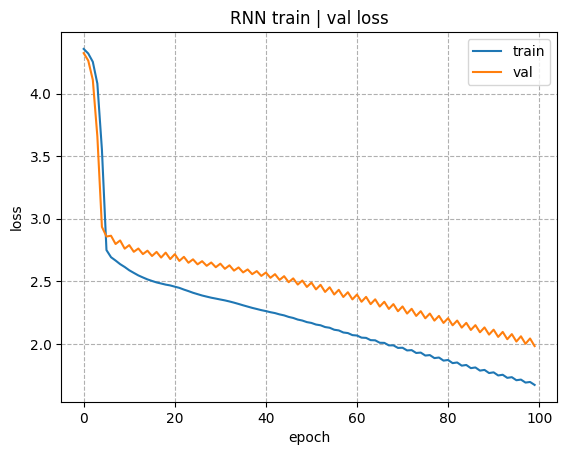

In [51]:
### 손실곡선
plt.title("RNN train | val loss")
plt.plot(history.epoch, history.history["loss"])
plt.plot(history.epoch, history.history["val_loss"])
plt.legend(["train", "val"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.grid(linestyle="--")
plt.show()

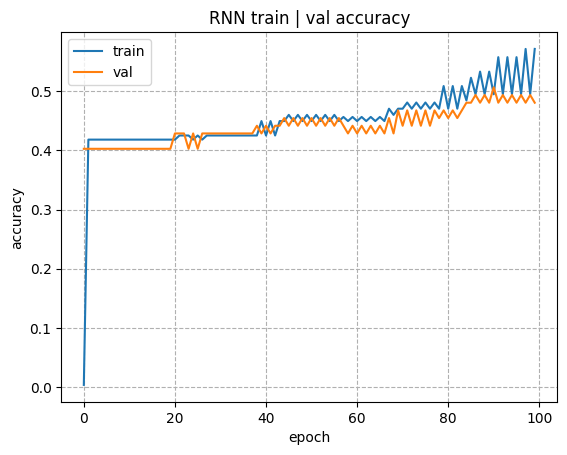

In [52]:
### 정확도 곡선
plt.title("RNN train | val accuracy")
plt.plot(history.epoch, history.history["accuracy"])
plt.plot(history.epoch, history.history["val_accuracy"])
plt.legend(["train", "val"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid(linestyle="--")
plt.show()

In [61]:
### 모델 생성하기

model = Sequential([
    ### 입력계층 추가하기(임베딩 계층 추가하기)
    # - input_dim : 말뭉치 갯수
    # - 출력갯수 : 64개
    # - input_length => 질문의 특성 갯수
    Embedding(
        input_dim=vocab_size,
        output_dim=64,
        input_length=questions_train.shape[1]
    ),
    ### 은닉계층 추가 : SimpleRNN, 출력:128, 활성화함수:tanh
    # - 질문을 담당하는 계층
    SimpleRNN(
        units=128,
        activation="tanh"
    ),
    Dropout(0.3),
    ### 질문을 담당하는 계층에서 넘어오는 결과는 6개의 질문 특성을 사용함
    # - 답변차원의 특성 7개로 변경한 후 답변을 담당하는 계층으로 넘겨주기
    RepeatVector(answers_train.shape[1]),
    ### 은닉계층 : simpleRNN 계층(질문 결과를 받아서 답변과의 일치성 훈련 시키기)
    # - return_sequences=True : 후련결과(단어)를 다음 계층으로 넘겨주기
    #                         : 다음계층에서 처리결과 단어들을 받아서 연속에서 훈련 진행합니다.
    SimpleRNN(
        units=128,
        activation="tanh",
        return_sequences=True
    ),
    Dropout(0.2),
    ### 단어조합 계층과 출력계층 정의하기
    # - TimeDistributed
    # - 전체 문장을 기준으로 위 계층에서 전달받은 단어들의 이전/다음 인덱스의 연결(문맥 연결)을 관리하는 계층
    # - 다음에 올 단어들이 있는지 체크
    # - 분류의 개념보다, 예측(회귀-시간적 흐름-단어의 문맥)의 개념을 담고있는 계층임
    # - 출력계층을 감싸서 사용하빈다.
    # ** 처리 순서 : 출력계층의 말뭉치 결과를 TimeDistributed 계층에서 확률이 높은 단어들을 조합하여 반환 
    TimeDistributed(
        Dense(
            units=vocab_size,
            activation="softmax"
        )
    )
])

model.summary()

### 모델 설정하기
# - RMSprop 사용, 학습율 기존값사용, 정확도 출력
model.compile(
    optimizer=keras.optimizers.RMSprop(),
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

### 훈련시키기
# - 훈련횟수 : 100회, 배치사이즈 : 64
history = model.fit(
    questions_padded,
    answers_padded,
    epochs=80,
    batch_size=64
)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 6, 64)             4992      
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 128)               24704     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 repeat_vector_6 (RepeatVect  (None, 7, 128)           0         
 or)                                                             
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 7, 128)            32896     
                                                                 
 dropout_5 (Dropout)         (None, 7, 128)            0         
                                                      

### 예측하기

In [62]:
### 예측을 위한 임의 질문 정의하기
user_input = "전기요금 어때?"

### 텍스트 문장 내에 단어를 추출하여 -> 말뭉치 인덱스 번호로 변환하기
# - 1차원 리스트로 넣어주기 -> 2차원 데이터로 반환해줍니다.
input_seq = tokenizer.texts_to_sequences([user_input])

### 데이터 스케일링 처리하기
# - 훈련시 사용한 질문의 특성 갯수로 스케일링해야 합니다.
# - maxlen 속성을 정의해야 합니다.
#  -> 외부 파일에서 모델을 사용하여 예측할 경우에는 maxlen의 값을 알고 있어야 합니다.
# - truncating 속성을 정의해야 합니다. : 질문이 길게 입력될 수 있기 때문에...
padded_seq = pad_sequences(input_seq, padding="post", truncating="post",
                           maxlen=questions_padded.shape[1])

### 예측하기
# - 말뭉치의 숫자로 예측을 해줍니다.
pred = model.predict(padded_seq)
# print(pred)

### 문자로 변환하기
# 예측 결과 값 중에 가장 큰 값이 있는 열단위 번호 추출하기
pred_index = tf.argmax(pred, axis=2).numpy()[0]
print(pred_index)


# 답변 문자(텍스트)로 변환하기
# - 리스트를 2차원으로 넣어줍니다.
a_text = tokenizer.sequences_to_texts([pred_index])[0]
a_text

1/1 [==============================] - 0s 157ms/step
[59 60 61  4  0  0  0]


'전기요금이 계속 인상되고 있어요'

In [63]:
### 예측을 위한 임의 질문 정의하기
user_input = "좋아하는 음악 장르가 있나요??"

### 텍스트 문장 내에 단어를 추출하여 -> 말뭉치 인덱스 번호로 변환하기
# - 1차원 리스트로 넣어주기 -> 2차원 데이터로 반환해줍니다.
input_seq = tokenizer.texts_to_sequences([user_input])

### 데이터 스케일링 처리하기
# - 훈련시 사용한 질문의 특성 갯수로 스케일링해야 합니다.
# - maxlen 속성을 정의해야 합니다.
#  -> 외부 파일에서 모델을 사용하여 예측할 경우에는 maxlen의 값을 알고 있어야 합니다.
# - truncating 속성을 정의해야 합니다. : 질문이 길게 입력될 수 있기 때문에...
padded_seq = pad_sequences(input_seq, padding="post", truncating="post",
                           maxlen=questions_padded.shape[1])

### 예측하기
# - 말뭉치의 숫자로 예측을 해줍니다.
pred = model.predict(padded_seq)
# print(pred)

### 문자로 변환하기
# 예측 결과 값 중에 가장 큰 값이 있는 열단위 번호 추출하기
pred_index = tf.argmax(pred, axis=2).numpy()[0]
print(pred_index)


# 답변 문자(텍스트)로 변환하기
# - 리스트를 2차원으로 넣어줍니다.
chatbot_text = tokenizer.sequences_to_texts([pred_index])[0]
print(f"{user_input} : {chatbot_text}")

1/1 [==============================] - 0s 17ms/step
[20 53 54 55  0  0  0]
좋아하는 음악 장르가 있나요?? : 저는 다양한 음악을 즐겨듣습니다


### 챗봇과 대화하는 프로그램 작성하기

In [56]:
"""
<함수 정의하기>
 - 함수명 : get_Answer
 - 기능 : 질문을 받아서 예측 후 -> 텍스트로 답변을 반환하는 기능
 
<실행 프로그램 정의하기>
 - 무한 반복
 - 받은 질문을 출력하기
 - 답변을 출력하기
 - "Q" 문자를 입력하면 무한반복 종료
  -> 종료시 챗봇은 "안녕히 가세요~"라고 답변하기
"""

'\n<함수 정의하기>\n - 함수명 : get_Answer\n - 기능 : 질문을 받아서 예측 후 -> 텍스트로 답변을 반환하는 기능\n \n<실행 프로그램 정의하기>\n - 무한 반복\n - 받은 질문을 출력하기\n - 답변을 출력하기\n - "Q" 문자를 입력하면 무한반복 종료\n  -> 종료시 챗봇은 "안녕히 가세요~"라고 답변하기\n'

In [64]:
def get_Answer(user_input=None):
    input_seq = tokenizer.texts_to_sequences([user_input])
    
    padded_seq = pad_sequences(input_seq, padding="post", truncating="post",
                                    maxlen=questions_padded.shape[1])
    pred = model.predict(padded_seq)

    pred_index = tf.argmax(pred, axis=2).numpy()[0]

    chatbot_text = tokenizer.sequences_to_texts([pred_index])[0]
    
    return(f"사용자 : {user_input}", f"보키봇 : {chatbot_text}")

In [65]:
get_Answer("좋아하는 음악 장르가 있나요??")

1/1 [==============================] - 0s 17ms/step


('사용자 : 좋아하는 음악 장르가 있나요??', '보키봇 : 저는 다양한 음악을 즐겨듣습니다')

In [1]:
def get_Answer(user_input):
    input_seq = tokenizer.texts_to_sequences([user_input])
    padded_seq = pad_sequences(input_seq, padding="post", truncating="post", maxlen=questions_padded.shape[1])
    pred = model.predict(padded_seq, verbose=0)
    pred_index = tf.argmax(pred, axis=2).numpy()[0]
    chatbot_text = tokenizer.sequences_to_texts([pred_index])[0]
    return chatbot_text


while True:
    user_input = input("질문을 입력하세요 (종료는 'Q'): ")
    
    if user_input.strip().upper() == "Q":
        print("보키봇 : 안녕히 가세요~")
        break
    
    print("사용자 :", user_input)
    answer = get_Answer(user_input)
    print("보키봇 :", answer)

사용자 : 안녕


NameError: name 'tokenizer' is not defined